In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde




In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
## Data Preprocessing

missing_values = data.isnull().sum()

# Output the missing values
print(missing_values)
## BMI contains missing values

## Use simple imputer

from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')  # or use strategy='median'

data['bmi'] = imputer.fit_transform(data[['bmi']])

# Check the results
print(data['bmi'].isnull().sum())  # Should be 0 if all missing values are filled




id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
0


In [5]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


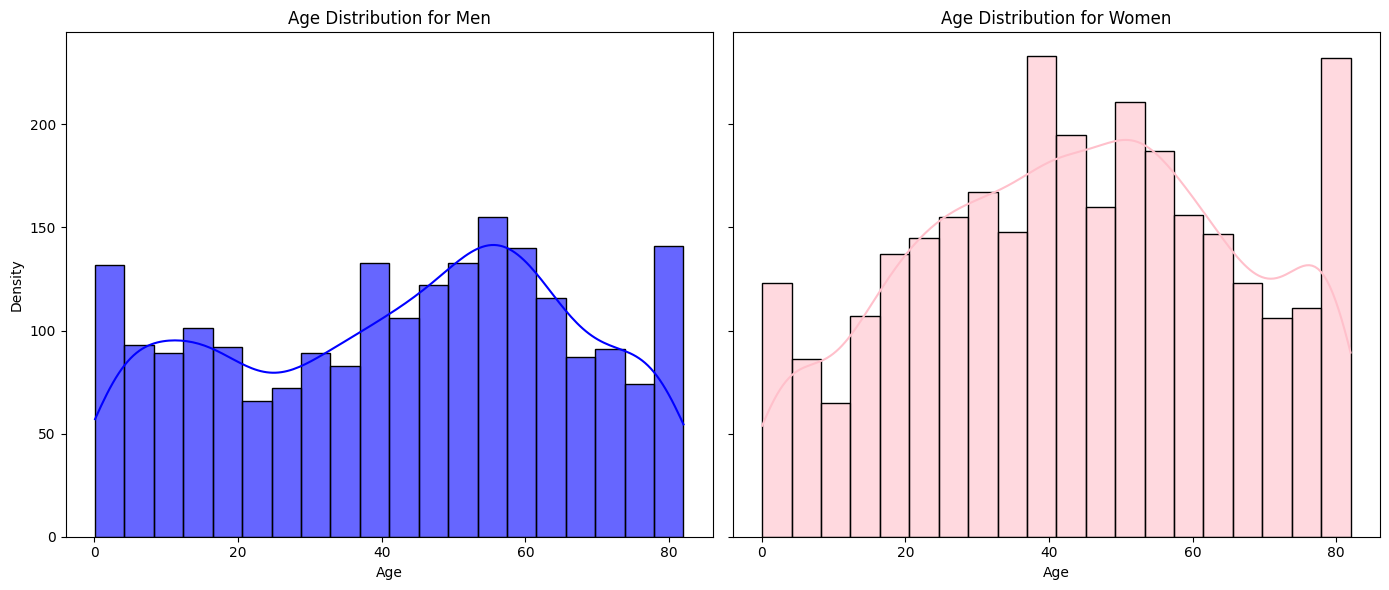

In [6]:
## EDA 

## Seperate data for men and women

data_men = data[data["gender"] == "Male"]
data_female = data[data["gender"] == "Female"]


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data_men['age'], kde=True, color='blue', bins=20, stat='count', ax=axes[0], alpha=0.6)
axes[0].set_title('Age Distribution for Men')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

sns.histplot(data_female['age'], kde=True, color='pink', bins=20, stat='count', ax=axes[1], alpha=0.6)
axes[1].set_title('Age Distribution for Women')
axes[1].set_xlabel('Age')

plt.tight_layout()

plt.show()

From the above plots we can see that there is a higher count of females in this dataset with large proportion of females in the age range of 80. Wheras in the male age distribution graph there is a more even spread

/var/folders/wx/q1jmzm0j1xz16s45y4d2kz2m0000gn/T/ipykernel_47320/3197290833.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")


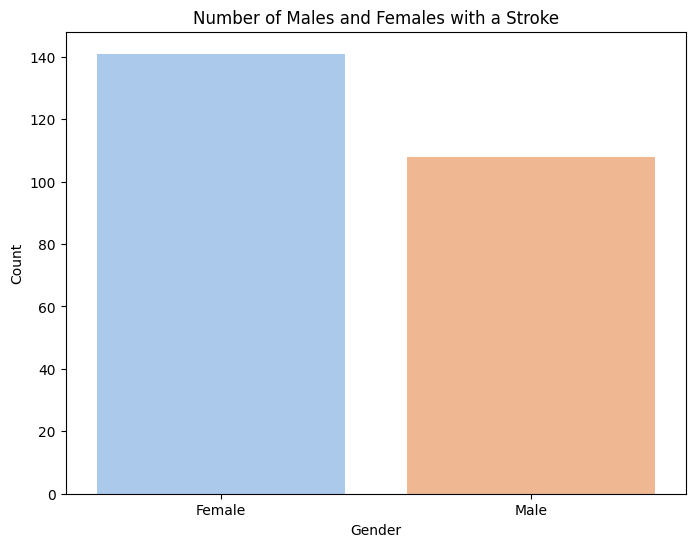

In [7]:
stroke_data = data[data['stroke'] == 1]

# Count the number of males and females with a stroke
gender_counts = stroke_data['gender'].value_counts()

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")

# Add titles and labels
plt.title("Number of Males and Females with a Stroke")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show plot
plt.show()


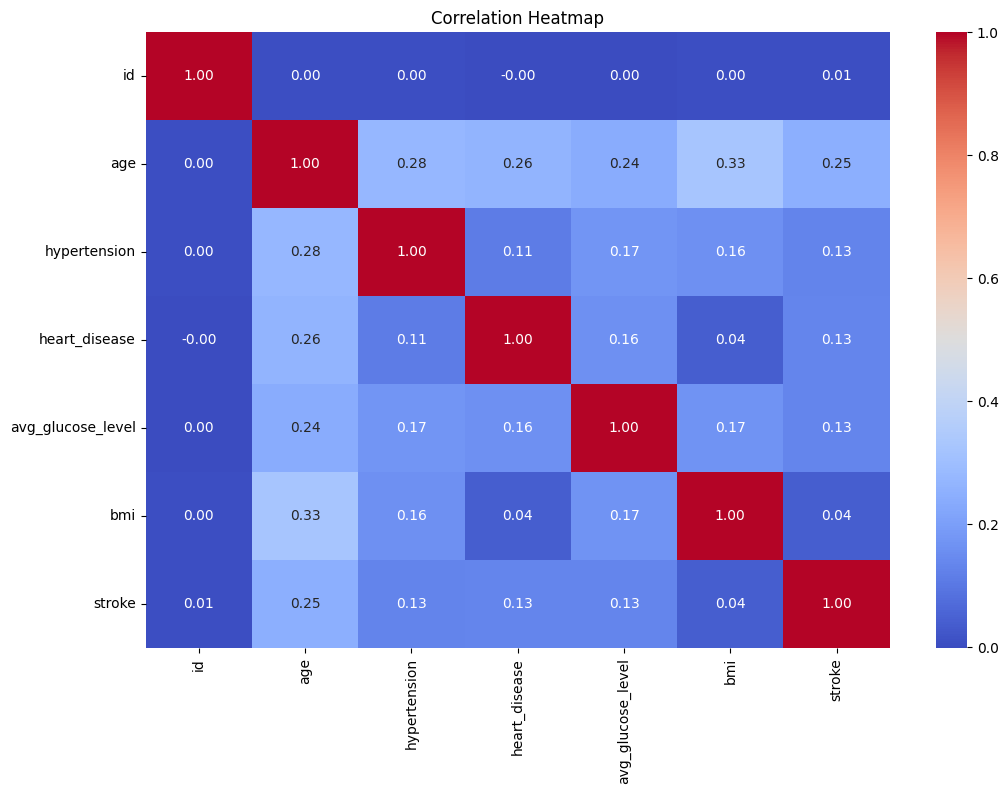

In [8]:
## Correlation Plot 
numeric_data = data.select_dtypes(include=['number'])


corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='gender', ylabel='count'>

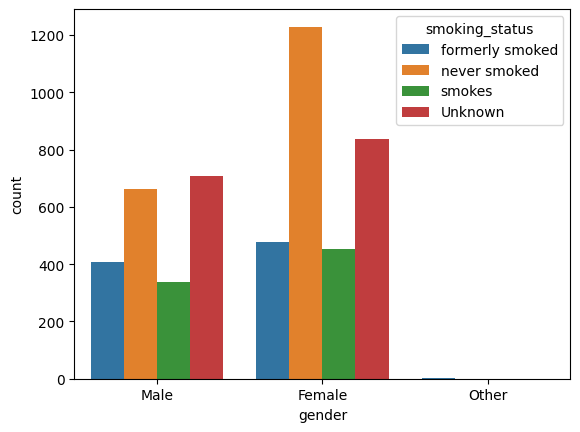

In [9]:
sns.countplot(data=data,x='gender',hue='smoking_status')


From this we can see that most females are unlikely to smoke 

<Axes: xlabel='heart_disease', ylabel='count'>

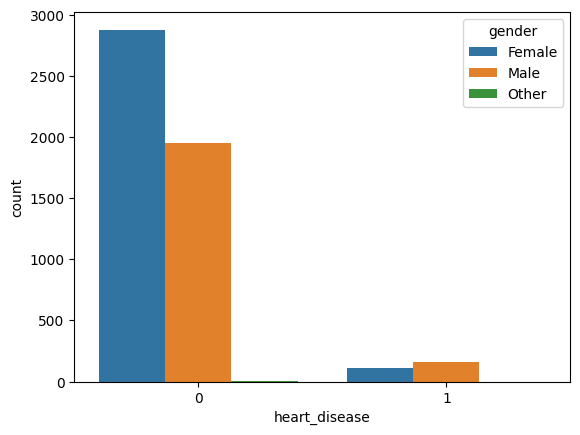

In [10]:
sns.countplot(data=data,x='heart_disease',hue='gender')


Less heart diesease for women 

<Axes: xlabel='hypertension', ylabel='count'>

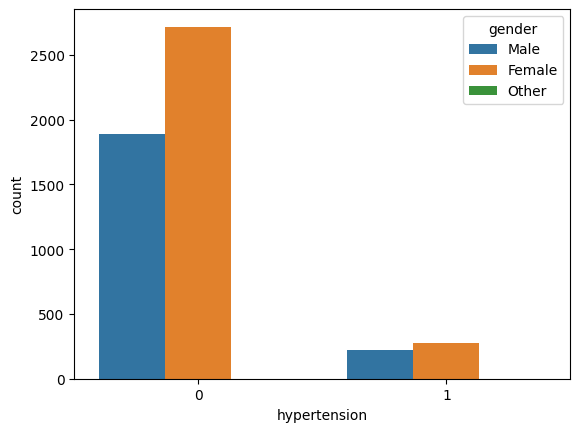

In [11]:
sns.countplot(data=data,x='hypertension',hue='gender')


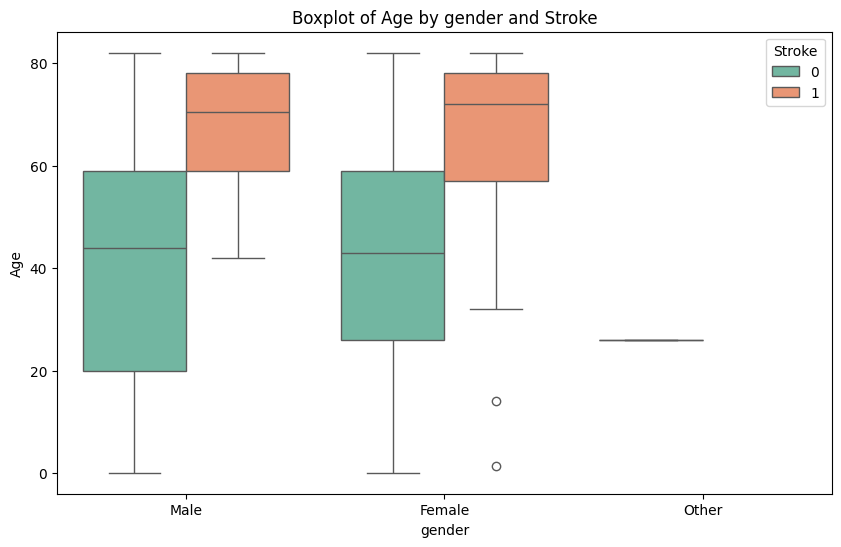

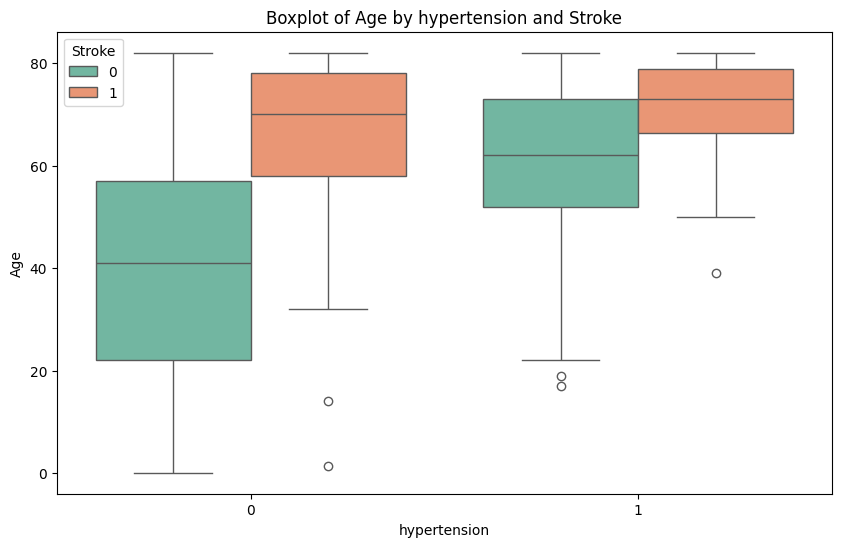

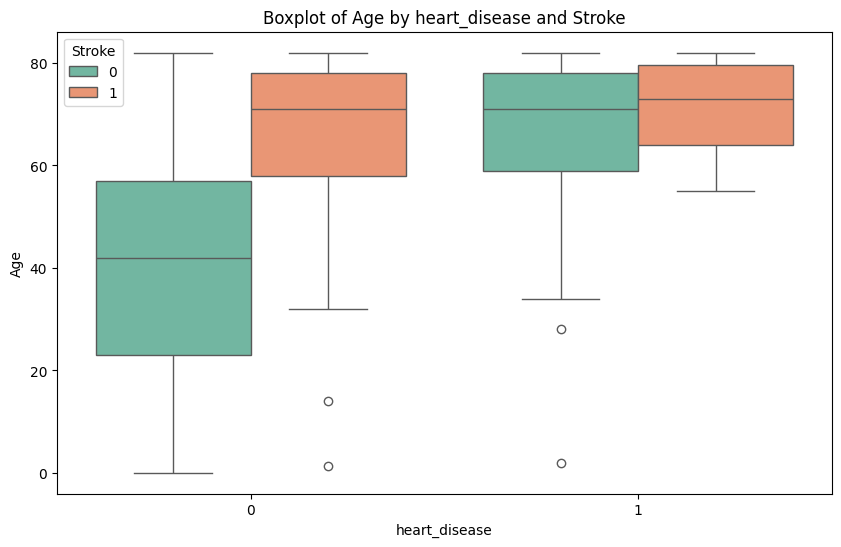

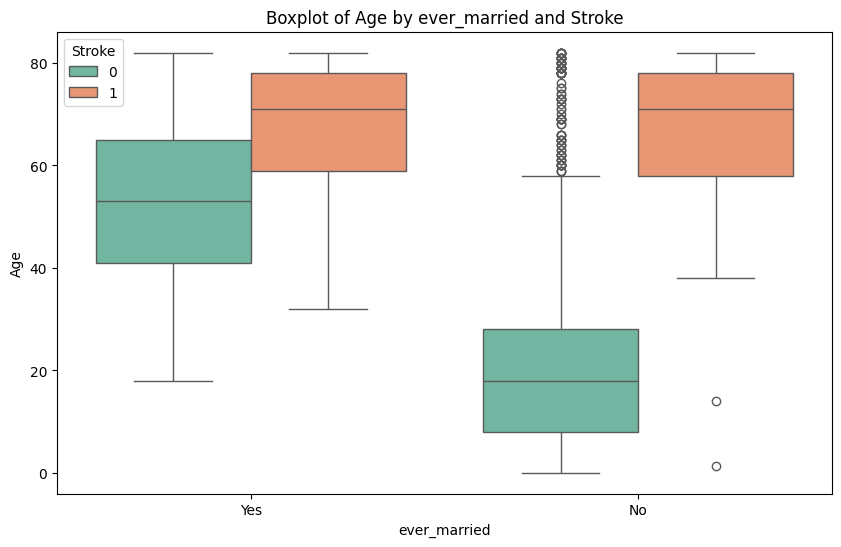

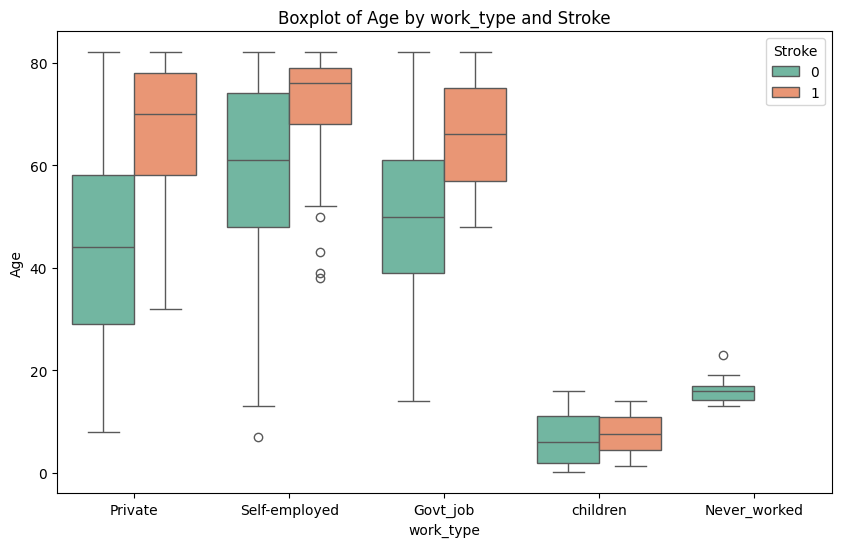

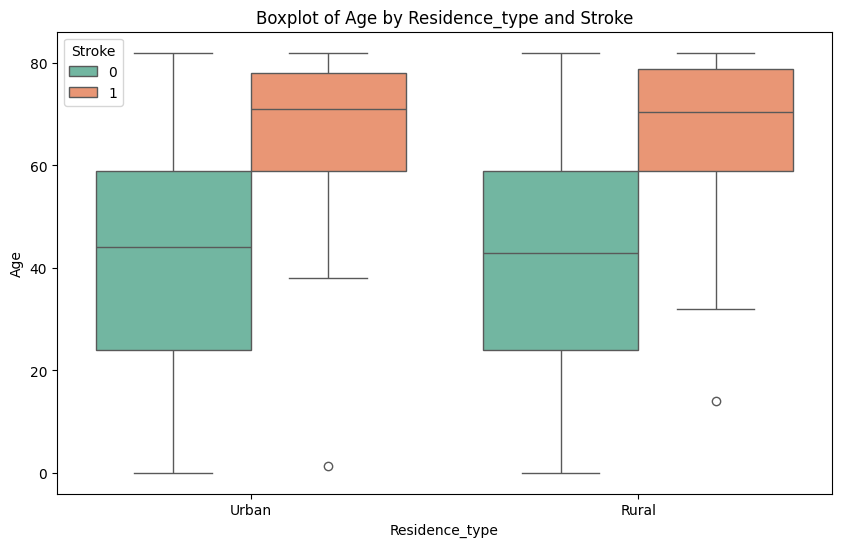

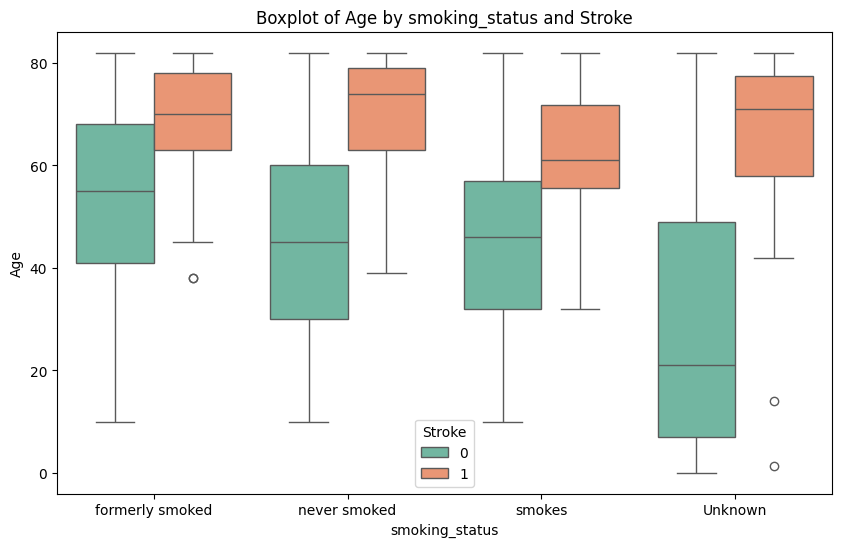

In [12]:
features=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
for cat_var in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=cat_var, y='age', hue='stroke', palette='Set2')
    plt.title(f'Boxplot of Age by {cat_var} and Stroke')
    plt.xlabel(cat_var)
    plt.ylabel('Age')
    plt.legend(title='Stroke')
    plt.show()

From this we can see that age is the most important feature as it is highly correlated

### Machine Learning model

In [13]:
## One hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
categorical_cols = [col for col in data.columns if data[col].dtype == 'object'] ## Gather categorical columns
le = LabelEncoder()
le.fit(data[categorical_cols].values.ravel()) 

def encode_label(col):
      return le.transform(col)
data[categorical_cols] =  data[categorical_cols].apply(encode_label) ## Apply it to testing set
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,2,67.0,0,1,11,6,10,228.69,36.600000,13,1
1,51676,0,61.0,0,0,11,8,7,202.21,28.893237,14,1
2,31112,2,80.0,0,1,11,6,7,105.92,32.500000,14,1
3,60182,0,49.0,0,0,11,6,10,171.23,34.400000,15,1
4,1665,0,79.0,1,0,11,8,7,174.12,24.000000,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,11,6,10,83.75,28.893237,14,0
5106,44873,0,81.0,0,0,11,8,10,125.20,40.000000,14,0
5107,19723,0,35.0,0,0,11,8,7,82.99,30.600000,14,0
5108,37544,2,51.0,0,0,11,6,7,166.29,25.600000,13,0


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV

X = data.drop(['stroke'], axis=1).values 
y = data['stroke'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score

# Function to generate a colored confusion matrix
def plot_confusion_matrix(model, X_test, y_test, class_labels):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Function to plot a histogram of model names and their accuracy scores
def plot_model_accuracies(model_names, accuracies):
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, accuracies, color='skyblue')
    plt.xlabel('Model Names')
    plt.ylabel('Accuracy Scores')
    plt.title('Model Accuracy Comparison')
    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
    plt.tight_layout()
    plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression - Train Score: 0.9505171931786414, Test Score: 0.949119373776908


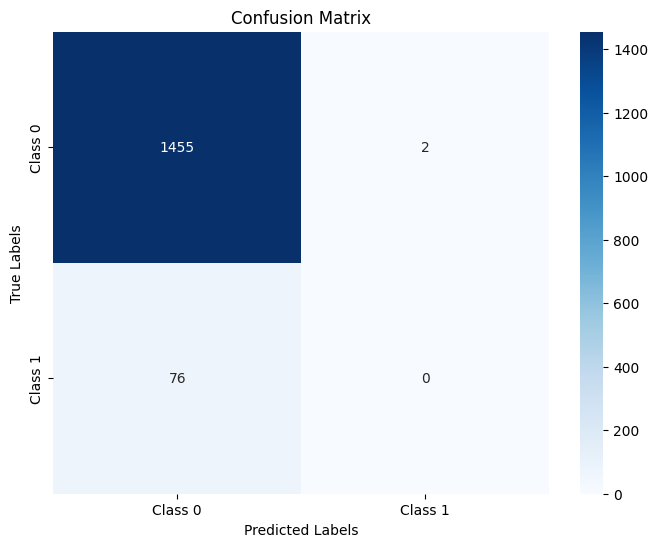

DecisionTreeClassifier - Train Score: 1.0, Test Score: 0.9041095890410958


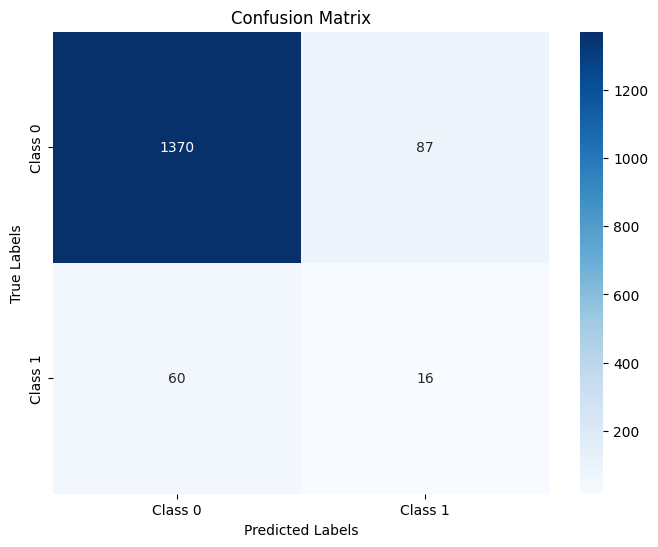

RandomForestClassifier - Train Score: 1.0, Test Score: 0.949119373776908


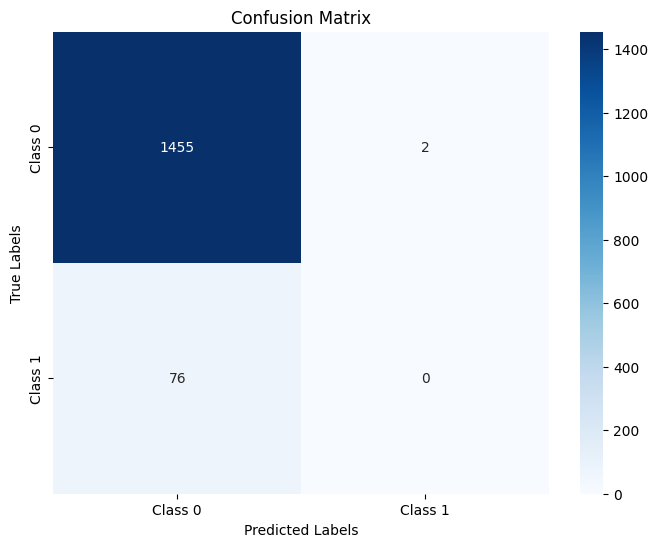

MLPClassifier - Train Score: 0.9516354487000279, Test Score: 0.9504240052185258


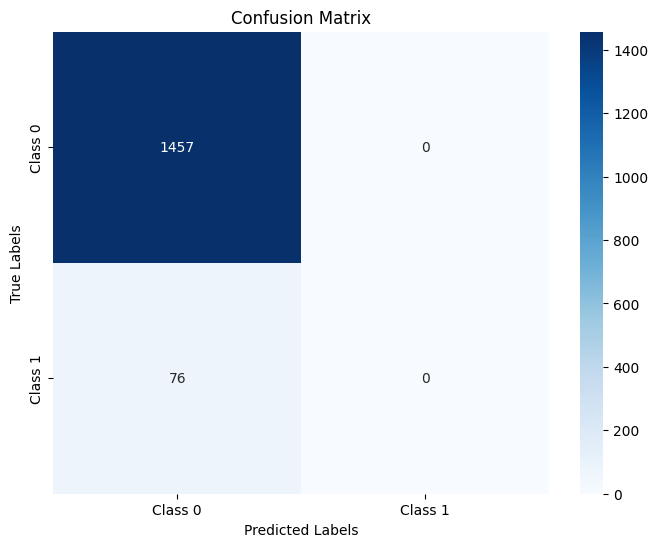

SVC - Train Score: 0.9516354487000279, Test Score: 0.9504240052185258


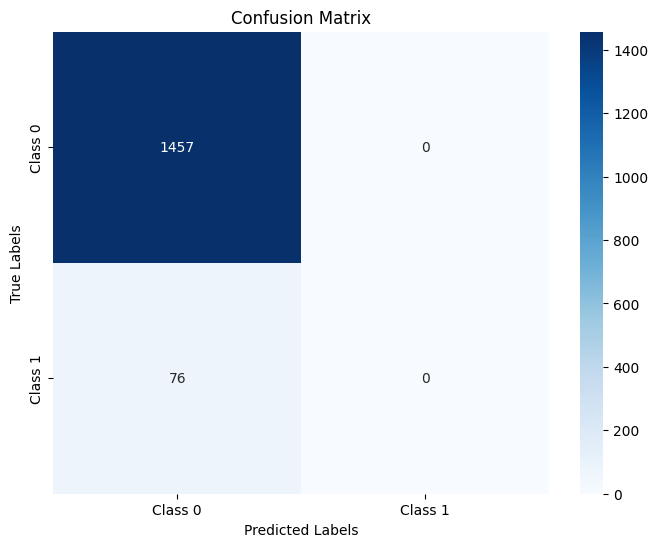

GradientBoostingClassifier - Train Score: 0.9616997483925077, Test Score: 0.9478147423352903


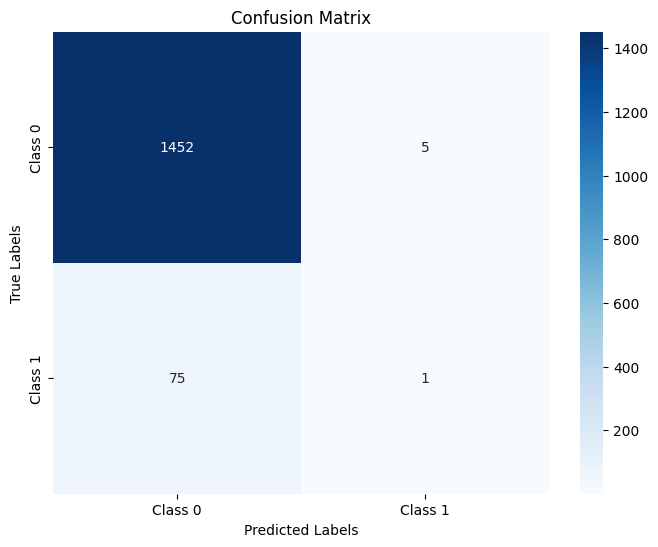

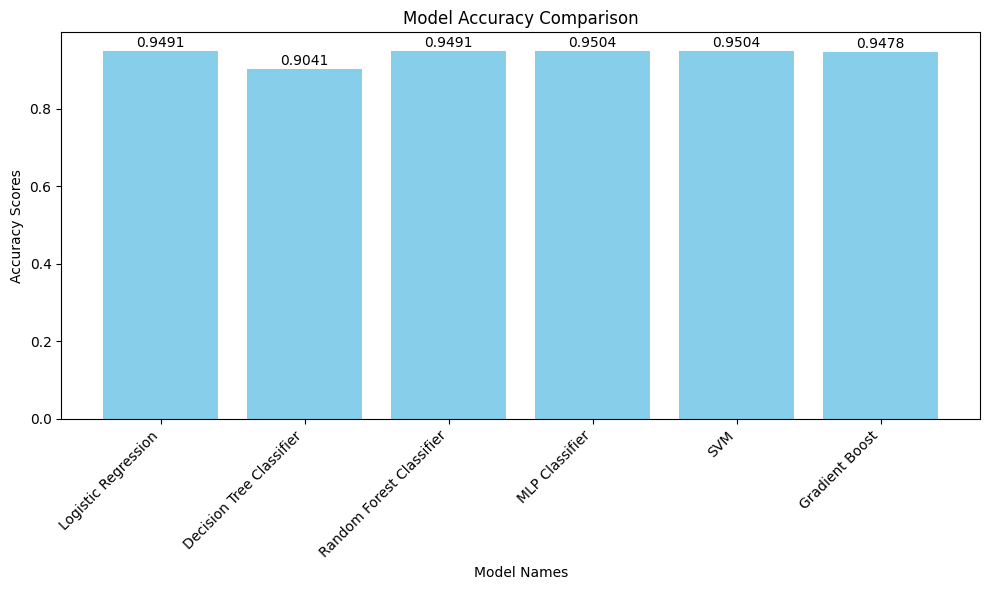

In [22]:
models= [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), MLPClassifier(), SVC(), GradientBoostingClassifier()]
model_names = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "MLP Classifier", "SVM", "Gradient Boost"]
accuracies = []

for model in models:
     train_score, test_score = evaluate_model(model, X_train , y_train , X_test, y_test)
     accuracies.append(test_score)
     print(f"{model.__class__.__name__} - Train Score: {train_score}, Test Score: {test_score}")
     plot_confusion_matrix(model, X_test, y_test, class_labels=["Class 0", "Class 1"])
plot_model_accuracies(model_names, accuracies)




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


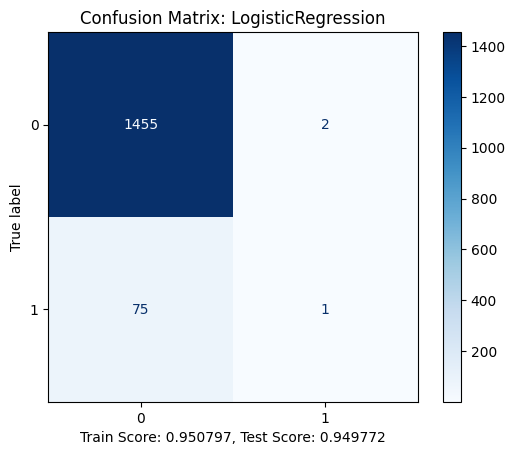

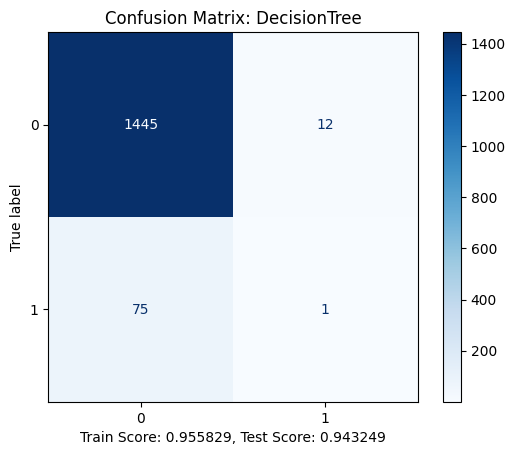

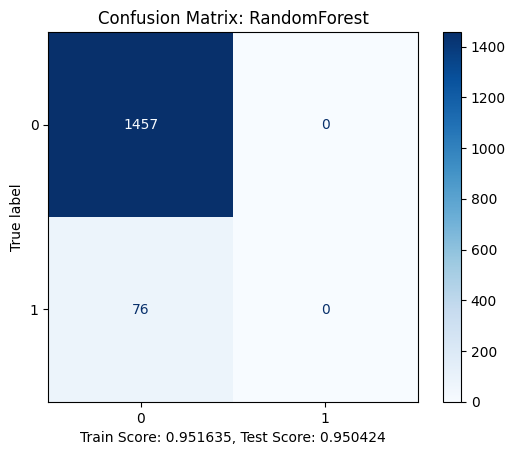

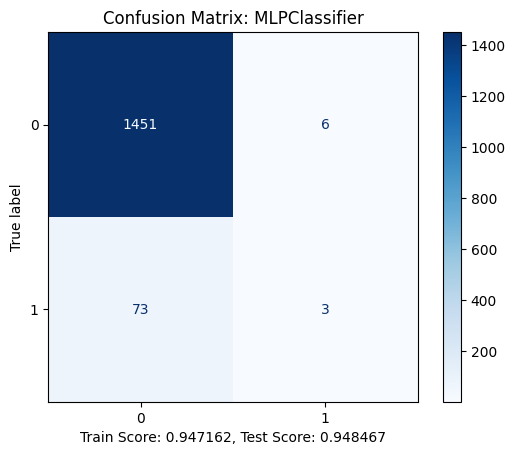

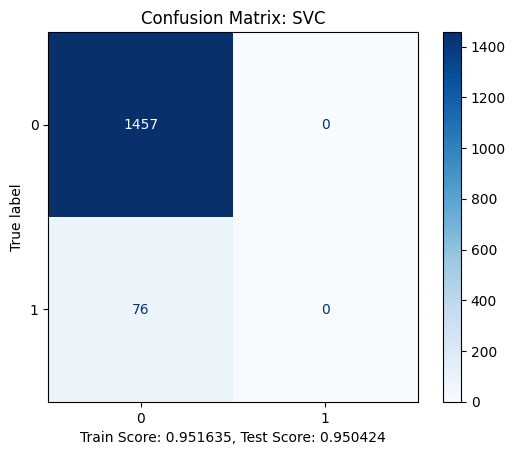

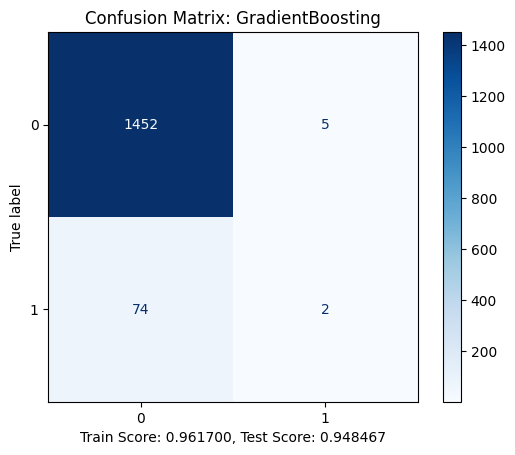

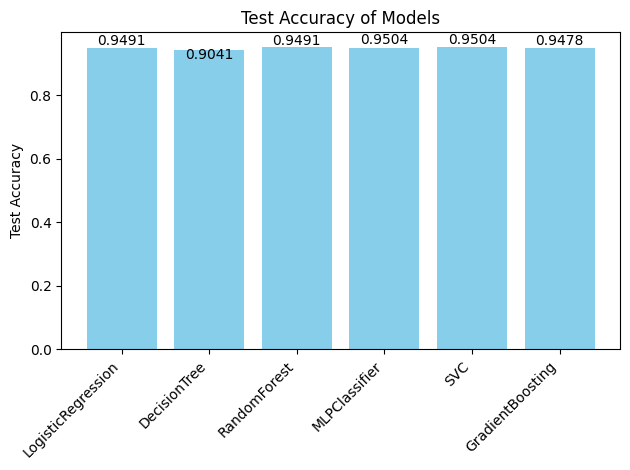

In [23]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay


# Define models and fixed hyperparameters
models = {
    "LogisticRegression": LogisticRegression(C=1.0, max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(max_depth=5, min_samples_split=10),
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=5),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(100,), alpha=0.001, max_iter=1000),
    "SVC": SVC(C=1.0, kernel="rbf"),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
}

def evaluate_models(models, X_train, X_test, y_train, y_test):
    test_accuracies = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        test_accuracies[name] = test_score

        # Plot confusion matrix
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
        plt.title(f"Confusion Matrix: {name}")
        plt.xlabel(f"Train Score: {train_score:.6f}, Test Score: {test_score:.6f}")
        plt.show()

    # Plot histogram of test accuracies
    plt.bar(test_accuracies.keys(), test_accuracies.values(), color="skyblue")
    plt.ylabel("Test Accuracy")
    plt.title("Test Accuracy of Models")
    plt.xticks(rotation=45, ha="right")
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
    plt.tight_layout()
    plt.show()

    return test_accuracies

# Evaluate models and visualize results
test_accuracies = evaluate_models(models, X_train, X_test, y_train, y_test)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


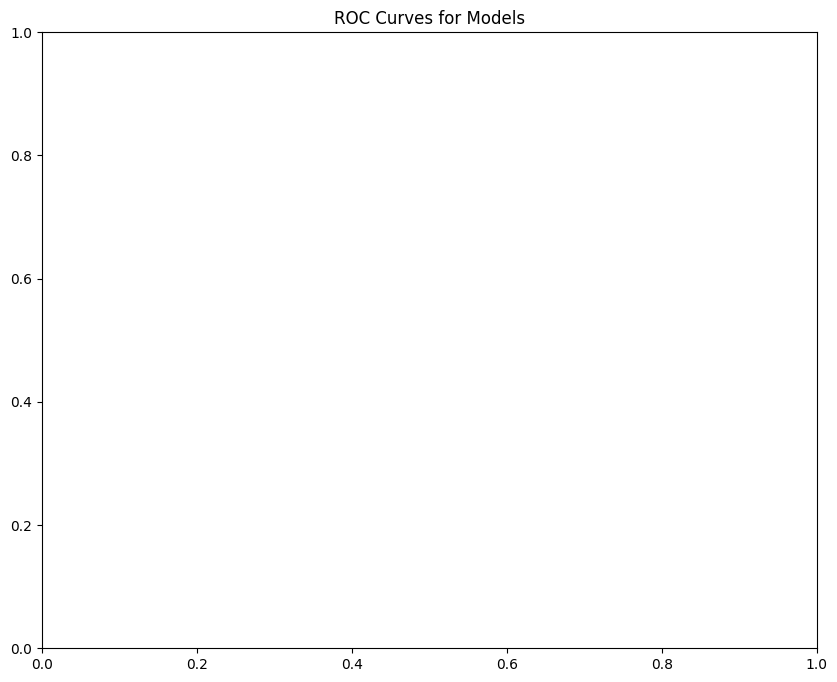

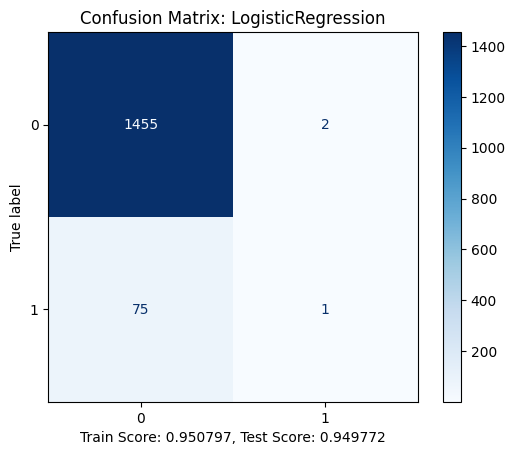

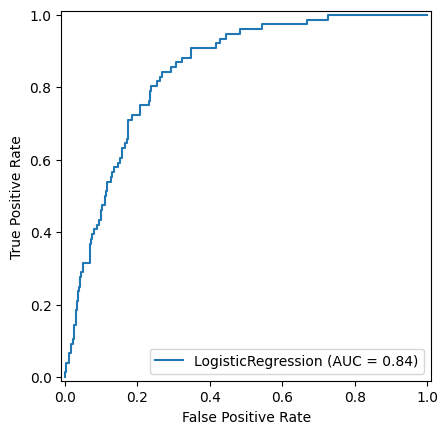

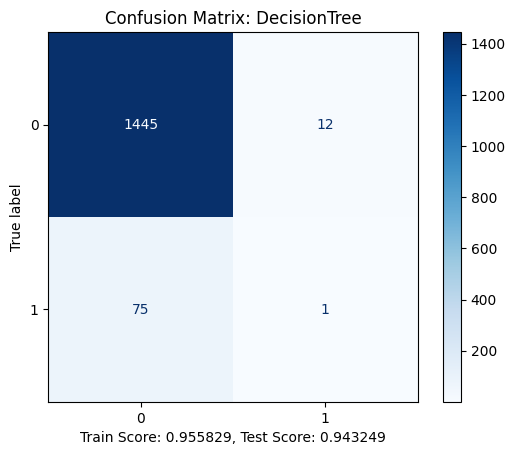

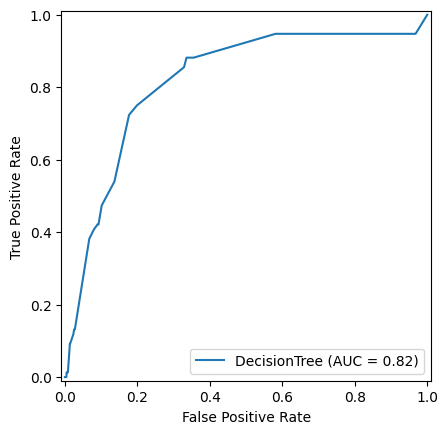

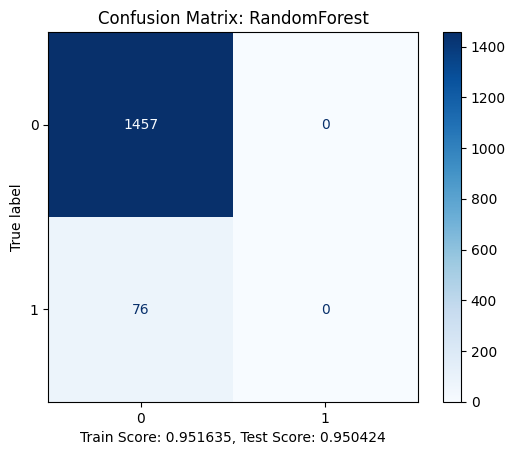

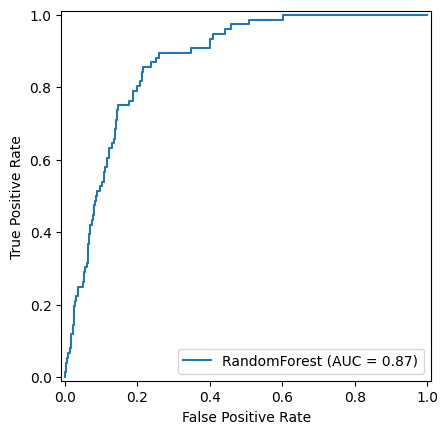

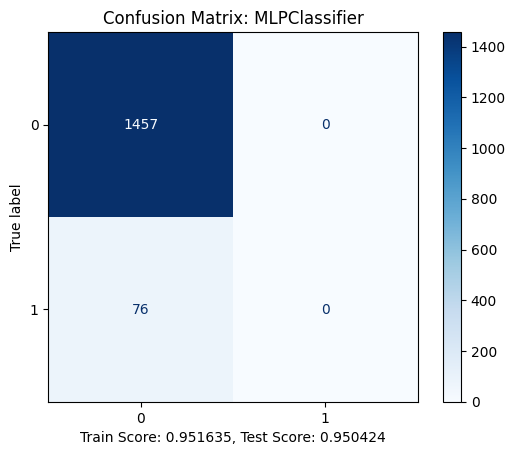

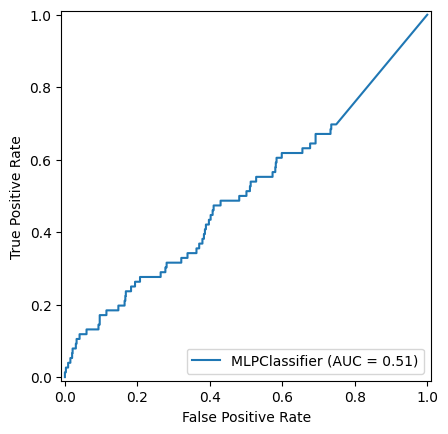

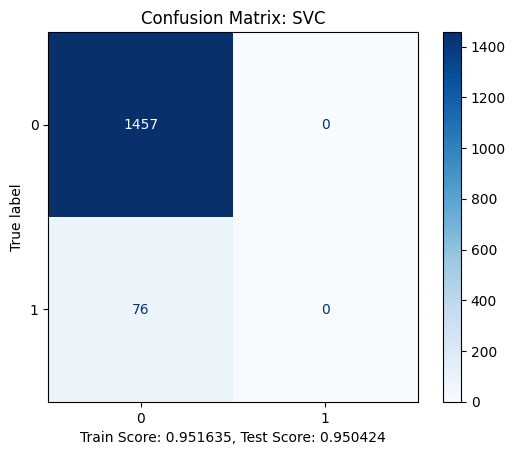

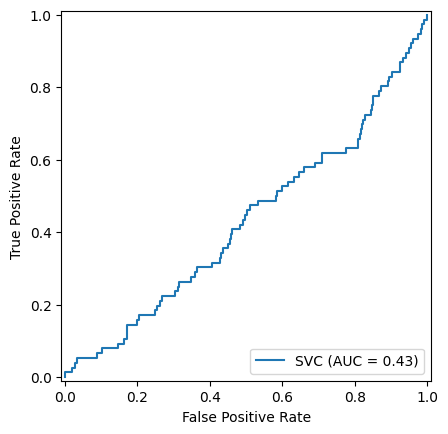

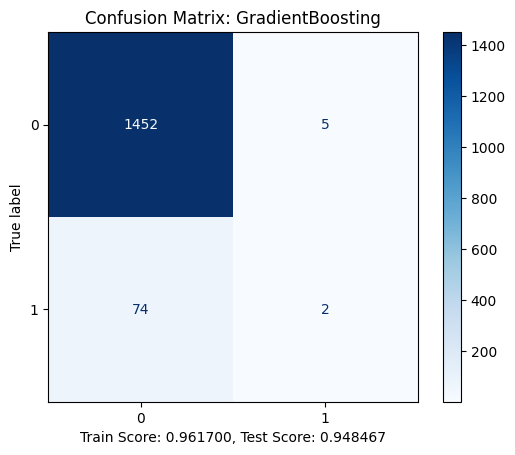

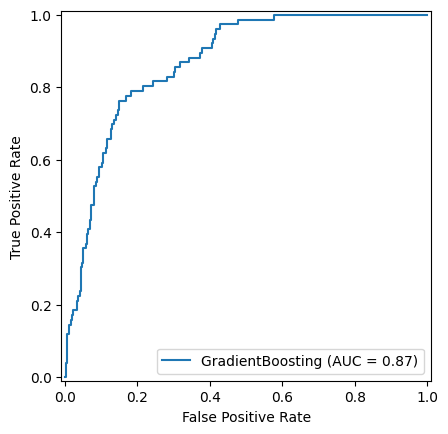

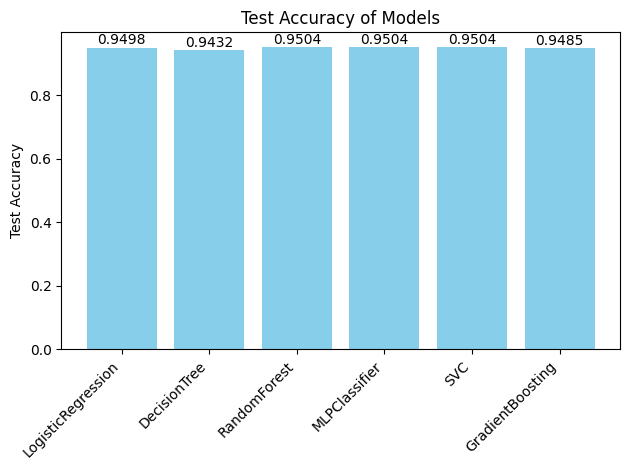

In [24]:
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    RocCurveDisplay
)

# Define models and fixed hyperparameters
models = {
    "LogisticRegression": LogisticRegression(C=1.0, max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(max_depth=5, min_samples_split=10),
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=5),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(100,), alpha=0.001, max_iter=1000),
    "SVC": SVC(C=1.0, kernel="rbf", probability=True),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
}
import random

random.seed(42)
def evaluate_models(models, X_train, X_test, y_train, y_test):
    test_accuracies = {}
    plt.figure(figsize=(10, 8))
    plt.title("ROC Curves for Models")

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Accuracy scores
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        test_accuracies[name] = test_score

        # Plot confusion matrix
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
        plt.title(f"Confusion Matrix: {name}")
        plt.xlabel(f"Train Score: {train_score:.6f}, Test Score: {test_score:.6f}")
        plt.show()

        # Compute and plot ROC curve
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name=name).plot(ax=plt.gca())
    plt.legend(loc="lower right")
    plt.show()

    # Plot histogram of test accuracies
    plt.bar(test_accuracies.keys(), test_accuracies.values(), color="skyblue")
    plt.ylabel("Test Accuracy")
    plt.title("Test Accuracy of Models")
    plt.xticks(rotation=45, ha="right")
    for i, v in enumerate(test_accuracies.values()):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
    plt.tight_layout()
    plt.show()

    return test_accuracies

# Call the function to evaluate models
test_accuracies = evaluate_models(models, X_train, X_test, y_train, y_test)
